### Stock Prediction  Using Stacked LSTM

In [49]:
### Data Collection
import pandas_datareader as pdr
key="e2e933138d72c4317d25713288f904bda903b4bc"

In [50]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

C:\Users\aftab\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [51]:
df.to_csv('TSLA.csv')

In [52]:
import pandas as pd

In [53]:
df=pd.read_csv('TSLA.csv')

In [54]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-07-02 00:00:00+00:00,335.07,364.78,329.85,360.07,18759765,22.338000,24.318667,21.990000,24.004667,281396475,0.0,1.0
1,TSLA,2018-07-03 00:00:00+00:00,310.86,332.49,309.69,331.75,12282638,20.724000,22.166000,20.646000,22.116667,184239570,0.0,1.0
2,TSLA,2018-07-05 00:00:00+00:00,309.16,314.39,296.22,313.76,17476374,20.610667,20.959333,19.748000,20.917333,262145610,0.0,1.0
3,TSLA,2018-07-06 00:00:00+00:00,308.90,312.07,302.00,304.95,8865451,20.593333,20.804667,20.133333,20.330000,132981765,0.0,1.0
4,TSLA,2018-07-09 00:00:00+00:00,318.51,318.52,308.00,311.99,7596753,21.234000,21.234667,20.533333,20.799333,113951295,0.0,1.0


In [55]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2023-06-26 00:00:00+00:00,241.05,258.3700,240.70,250.065,179990552,241.05,258.3700,240.70,250.065,179990552,0.0,1.0
1254,TSLA,2023-06-27 00:00:00+00:00,250.21,250.3899,240.85,243.240,164968214,250.21,250.3899,240.85,243.240,164968214,0.0,1.0
1255,TSLA,2023-06-28 00:00:00+00:00,256.24,259.8800,248.89,249.700,159770797,256.24,259.8800,248.89,249.700,159770797,0.0,1.0
1256,TSLA,2023-06-29 00:00:00+00:00,257.50,260.7400,253.61,258.030,131283360,257.50,260.7400,253.61,258.030,131283360,0.0,1.0
1257,TSLA,2023-06-30 00:00:00+00:00,261.77,264.4500,259.89,260.600,112620784,261.77,264.4500,259.89,260.600,112620784,0.0,1.0


In [56]:
df1=df.reset_index()['close']

In [57]:
df1

0       335.07
1       310.86
2       309.16
3       308.90
4       318.51
         ...  
1253    241.05
1254    250.21
1255    256.24
1256    257.50
1257    261.77
Name: close, Length: 1258, dtype: float64

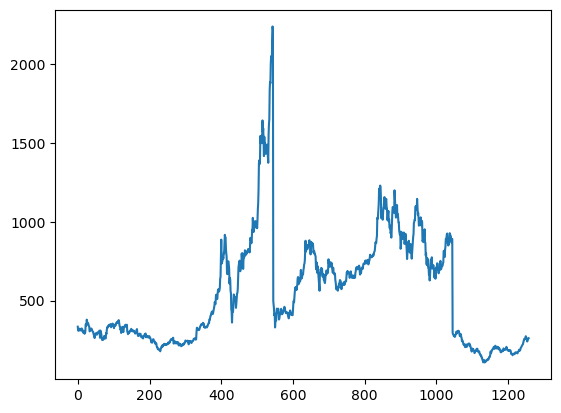

In [58]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [59]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [60]:
import numpy as np

In [61]:
df1

0       335.07
1       310.86
2       309.16
3       308.90
4       318.51
         ...  
1253    241.05
1254    250.21
1255    256.24
1256    257.50
1257    261.77
Name: close, Length: 1258, dtype: float64

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [63]:
print(df1)

[[0.10652618]
 [0.09516345]
 [0.09436557]
 ...
 [0.06952808]
 [0.07011945]
 [0.07212353]]


In [64]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [65]:
training_size,test_size

(817, 441)

In [66]:
train_data

array([[0.10652618],
       [0.09516345],
       [0.09436557],
       [0.09424354],
       [0.0987539 ],
       [0.10061249],
       [0.0989651 ],
       [0.09790909],
       [0.09892286],
       [0.09480675],
       [0.10071574],
       [0.10126018],
       [0.09956117],
       [0.09644005],
       [0.0915683 ],
       [0.08886021],
       [0.09416845],
       [0.09318752],
       [0.08874287],
       [0.0854528 ],
       [0.08919344],
       [0.09046066],
       [0.11331753],
       [0.11267454],
       [0.10977401],
       [0.12741182],
       [0.12307981],
       [0.11468331],
       [0.11611011],
       [0.1165419 ],
       [0.11242579],
       [0.10822519],
       [0.10670453],
       [0.09264778],
       [0.09402764],
       [0.10034497],
       [0.10022294],
       [0.09950015],
       [0.10077676],
       [0.0991106 ],
       [0.09563279],
       [0.09241781],
       [0.09154483],
       [0.09084552],
       [0.0848802 ],
       [0.08102692],
       [0.08112548],
       [0.072

In [67]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [68]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [69]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [70]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [71]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [72]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [73]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 272ms/step - loss: 0.0250 - val_loss: 0.0072
Epoch 2/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0127 - val_loss: 0.0086
Epoch 3/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0081 - val_loss: 0.0027
Epoch 4/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0064 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0067 - val_loss: 0.0021
Epoch 6/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 7/100
12/12 [==============================] - 4s 335ms/step - loss: 0.0067 - val_loss: 0.0021
Epoch 8/100
12/12 [==============================] - 4s 372ms/step - loss: 0.0057 - val_loss: 0.0023
Epoch 9/100
12/12 [==============================] - 4s 309ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 10/100
12/12 [==============================] - 3s 287ms/step - loss: 0.0055 - val_lo

12/12 [==============================] - 2s 185ms/step - loss: 0.0013 - val_loss: 8.7508e-04
Epoch 82/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0012 - val_loss: 8.9427e-04
Epoch 83/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 84/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 85/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 86/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 87/100
12/12 [==============================] - 2s 182ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 88/100
12/12 [==============================] - 2s 184ms/step - loss: 9.2061e-04 - val_loss: 9.1977e-04
Epoch 89/100
12/12 [==============================] - 2s 181ms/step - loss: 9.1062e-04 - val_loss: 0.0011
Epoch 90/100
12/12 [==============================] - 2s 180ms/step - loss:

In [77]:
import tensorflow as tf

In [78]:
tf.__version__

'2.12.0'

In [79]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [80]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [81]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

655.0058100997057

In [82]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

552.1561927436618

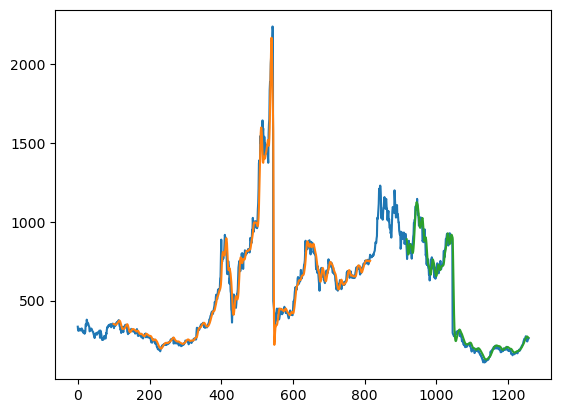

In [83]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [84]:
len(test_data)

441

In [85]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [86]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [87]:
temp_input

[0.0416351817520475,
 0.04373782648487551,
 0.04656794874803463,
 0.04167272897941943,
 0.04061671320958392,
 0.047473775608382424,
 0.049815783915706485,
 0.04408983174148734,
 0.047032595686762255,
 0.04189801234365101,
 0.043536010137751394,
 0.04410391195175181,
 0.041668035575997936,
 0.04671344425410086,
 0.04581231079717457,
 0.04443245019125619,
 0.038861380329946266,
 0.04209513528735362,
 0.040227160725600175,
 0.0373641846384906,
 0.034684251284819195,
 0.030422640978105264,
 0.03066669795602281,
 0.031154811911857885,
 0.03527562011592707,
 0.033956773754488065,
 0.03568394621359679,
 0.03380658484500035,
 0.035270926712505576,
 0.041996573815502314,
 0.03897871541548355,
 0.03948090958158308,
 0.03863140356229319,
 0.03928848004130195,
 0.038058808344871284,
 0.04026001454955061,
 0.040917091028559366,
 0.046633656395935516,
 0.040677727454063325,
 0.039649872104756775,
 0.03633632928918405,
 0.036120432731795465,
 0.03586229554361345,
 0.036932391523713415,
 0.03399901438

In [88]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.07253173]
101
1 day input [0.04373783 0.04656795 0.04167273 0.04061671 0.04747378 0.04981578
 0.04408983 0.0470326  0.04189801 0.04353601 0.04410391 0.04166804
 0.04671344 0.04581231 0.04443245 0.03886138 0.04209514 0.04022716
 0.03736418 0.03468425 0.03042264 0.0306667  0.03115481 0.03527562
 0.03395677 0.03568395 0.03380658 0.03527093 0.04199657 0.03897872
 0.03948091 0.0386314  0.03928848 0.03805881 0.04026001 0.04091709
 0.04663366 0.04067773 0.03964987 0.03633633 0.03612043 0.0358623
 0.03693239 0.03399901 0.03651468 0.03609227 0.03704973 0.03576843
 0.03402248 0.02576209 0.02674301 0.02555558 0.02467322 0.02142539
 0.02444794 0.02638162 0.02521766 0.02450426 0.02464506 0.02492197
 0.02908033 0.02989229 0.02865323 0.02836693 0.0300284  0.0281041
 0.02733907 0.02741886 0.03086382 0.03228592 0.03381128 0.03790862
 0.03645366 0.03510666 0.03584352 0.03992678 0.04367681 0.04497688
 0.04666182 0.04968906 0.05139746 0.05313402 0.05466407 0.05949358
 0.06397109 0.06651961 0.07068735 0

11 day output [[0.08185464]]
12 day input [0.04166804 0.04671344 0.04581231 0.04443245 0.03886138 0.04209514
 0.04022716 0.03736418 0.03468425 0.03042264 0.0306667  0.03115481
 0.03527562 0.03395677 0.03568395 0.03380658 0.03527093 0.04199657
 0.03897872 0.03948091 0.0386314  0.03928848 0.03805881 0.04026001
 0.04091709 0.04663366 0.04067773 0.03964987 0.03633633 0.03612043
 0.0358623  0.03693239 0.03399901 0.03651468 0.03609227 0.03704973
 0.03576843 0.03402248 0.02576209 0.02674301 0.02555558 0.02467322
 0.02142539 0.02444794 0.02638162 0.02521766 0.02450426 0.02464506
 0.02492197 0.02908033 0.02989229 0.02865323 0.02836693 0.0300284
 0.0281041  0.02733907 0.02741886 0.03086382 0.03228592 0.03381128
 0.03790862 0.03645366 0.03510666 0.03584352 0.03992678 0.04367681
 0.04497688 0.04666182 0.04968906 0.05139746 0.05313402 0.05466407
 0.05949358 0.06397109 0.06651961 0.07068735 0.06978622 0.0693685
 0.07154624 0.07807477 0.07103935 0.07345646 0.06969704 0.0623988
 0.06669796 0.06952808 

19 day output [[0.08922908]]
20 day input [0.03468425 0.03042264 0.0306667  0.03115481 0.03527562 0.03395677
 0.03568395 0.03380658 0.03527093 0.04199657 0.03897872 0.03948091
 0.0386314  0.03928848 0.03805881 0.04026001 0.04091709 0.04663366
 0.04067773 0.03964987 0.03633633 0.03612043 0.0358623  0.03693239
 0.03399901 0.03651468 0.03609227 0.03704973 0.03576843 0.03402248
 0.02576209 0.02674301 0.02555558 0.02467322 0.02142539 0.02444794
 0.02638162 0.02521766 0.02450426 0.02464506 0.02492197 0.02908033
 0.02989229 0.02865323 0.02836693 0.0300284  0.0281041  0.02733907
 0.02741886 0.03086382 0.03228592 0.03381128 0.03790862 0.03645366
 0.03510666 0.03584352 0.03992678 0.04367681 0.04497688 0.04666182
 0.04968906 0.05139746 0.05313402 0.05466407 0.05949358 0.06397109
 0.06651961 0.07068735 0.06978622 0.0693685  0.07154624 0.07807477
 0.07103935 0.07345646 0.06969704 0.0623988  0.06669796 0.06952808
 0.07011945 0.07212353 0.07253173 0.07281362 0.07345396 0.07429032
 0.07521564 0.076171

27 day output [[0.0962681]]
28 day input [0.03527093 0.04199657 0.03897872 0.03948091 0.0386314  0.03928848
 0.03805881 0.04026001 0.04091709 0.04663366 0.04067773 0.03964987
 0.03633633 0.03612043 0.0358623  0.03693239 0.03399901 0.03651468
 0.03609227 0.03704973 0.03576843 0.03402248 0.02576209 0.02674301
 0.02555558 0.02467322 0.02142539 0.02444794 0.02638162 0.02521766
 0.02450426 0.02464506 0.02492197 0.02908033 0.02989229 0.02865323
 0.02836693 0.0300284  0.0281041  0.02733907 0.02741886 0.03086382
 0.03228592 0.03381128 0.03790862 0.03645366 0.03510666 0.03584352
 0.03992678 0.04367681 0.04497688 0.04666182 0.04968906 0.05139746
 0.05313402 0.05466407 0.05949358 0.06397109 0.06651961 0.07068735
 0.06978622 0.0693685  0.07154624 0.07807477 0.07103935 0.07345646
 0.06969704 0.0623988  0.06669796 0.06952808 0.07011945 0.07212353
 0.07253173 0.07281362 0.07345396 0.07429032 0.07521564 0.07617148
 0.07713144 0.07808641 0.07903501 0.07997842 0.08091801 0.08185464
 0.08278869 0.08372  

In [89]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [90]:
import matplotlib.pyplot as plt

In [91]:
len(df1)

1258

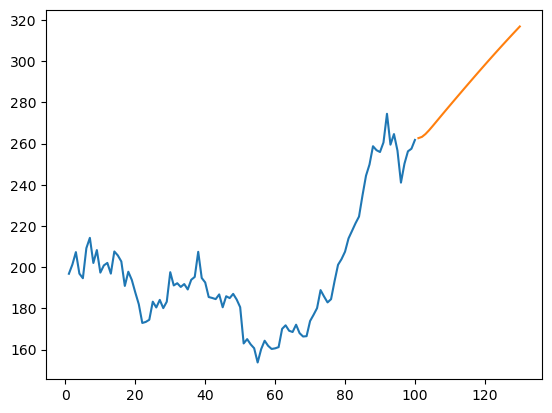

In [92]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

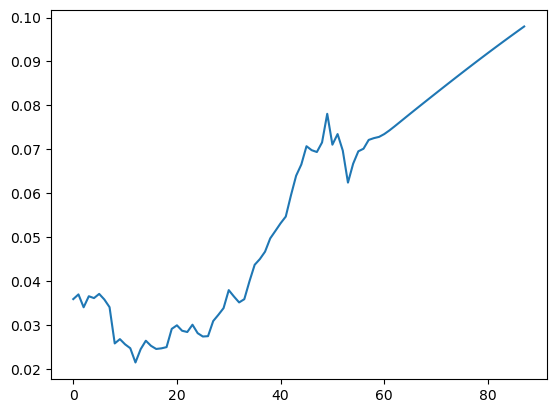

In [93]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [94]:
df3=scaler.inverse_transform(df3).tolist()

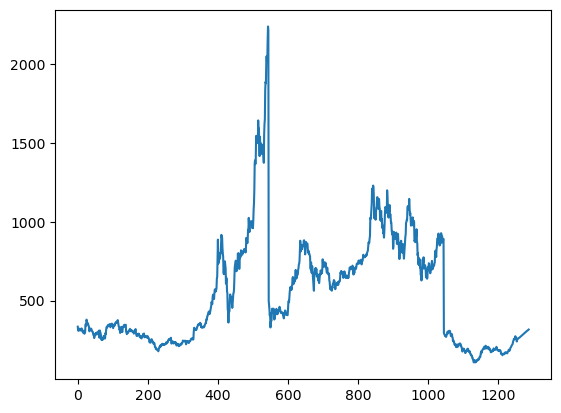

In [95]:
plt.plot(df3)